In [1]:
using LinearAlgebra
using BenchmarkTools
using PyPlot

In [2]:
function eye(n)
    return Matrix{Float64}(I,n,n)
end

eye (generic function with 1 method)

## Metoda Potęgowa

In [3]:
function naive_power_method(A, l)
    n = size(A, 1)
    x = ones(n, 1)
    for i in 1:l
        x = A * x
        x = x / norm(x)
    end
    λ = x'*A*x
    return λ, x
end

naive_power_method (generic function with 1 method)

In [34]:
function typed_power_method(A::Matrix{Float64}, l::Integer)
    n::Int64 = size(A, 1)
    x::Array{Float64} = ones(n, 1)
    for i::Int64 in 1:l
        x = A * x
        x = x / norm(x)
    end
    λ::Float64 = (x'*A*x)[1]
    return λ, x
end

typed_power_method (generic function with 2 methods)

In [50]:
function typed_power_method_err(A::Matrix{Float64}, l::Integer, expected_eigenvalue::Float64)
    Δλ::Array{Float64} = []
    n::Int64 = size(A, 1)
    x::Array{Float64} = ones(n, 1)
    λ::Float64 = 0
    for i::Int64 in 1:l
        x = A * x
        x = x / norm(x)
        λ = (x'*A*x)[1]
        push!(Δλ, abs(λ - expected_eigenvalue))
    end
#     λ::Float64 = (x'*A*x)[1]
    return λ, x, Δλ
end

typed_power_method_err (generic function with 4 methods)

In [18]:
function typed_power_method(A::Symmetric{Float64}, l::Integer)
    n::Int64 = size(A, 1)
    x::Array{Float64} = ones(n, 1)
    for i::Int64 in 1:l
        x = A * x
        x = x / norm(x)
    end
    λ::Float64 = (x'*A*x)[1]
    return λ, x
end

typed_power_method (generic function with 2 methods)

In [65]:
function typed_power_method_err(A::Symmetric{Float64}, l::Integer, expected_eigenvalue::Float64)
    Δλ::Array{Float64} = []
    n::Int64 = size(A, 1)
    x::Array{Float64} = ones(n, 1)
    λ::Float64 = 0
    for i::Int64 in 1:l
        x = A * x
        x = x / norm(x)
        λ = (x'*A*x)[1]
        push!(Δλ, abs(λ - expected_eigenvalue))
    end
#     λ::Float64 = (x'*A*x)[1]
    return λ, x, Δλ
end

typed_power_method_err (generic function with 4 methods)

## Metoda Jacobiego

In [5]:
function maxst(A)
    s = 1;
    t = 2;
    n = size(A,1);

    for c = 2:n
        for r = 1:c-1
            if abs(A[r,c]) > abs(A[s,t])
            s = r;
            t = c;
            end
        end
    end
    return s,t
end

maxst (generic function with 1 method)

In [99]:
function jacobi_err(A::Matrix{Float64}, l::Integer, expected_eigenvalues::Vector{Float64})
    Δλ::Array{Array{Float64}} = []
    n = size(A,1);
    E = eye(n);
    λ = zeros(n)
    for i = 1:l
        s,t = maxst(A);
        d = sqrt((A[s,s] - A[t,t])^2 + 4*A[s,t]^2);
        sin2t = 2*A[s,t]/d;
        cos2t = (A[s,s] - A[t,t]) / d;
        dt = sqrt(2*(1+cos2t));
        sint = abs(sin2t) / dt;
        cost = abs((1+ cos2t) / dt);
        cost = sign(A[s,t]) * cost;

        R = eye(n);
        R[s,s] = cost;
        R[t,t] = cost;
        R[s,t] = -sint;
        R[t,s] = sint;
        A = R'*A*R;
        λ = sort!(diag(A));
        push!(Δλ, abs.(λ - expected_eigenvalues))
        E = E*R; 
    end
    return diag(A), E, Δλ
end

jacobi_err (generic function with 2 methods)

In [123]:
function jacobi_err(A::Symmetric{Float64}, l::Integer, expected_eigenvalues::Vector{Float64})
    Δλ::Array{Array{Float64}} = []
    n = size(A,1);
    E = eye(n);
    λ = zeros(n)
    for i = 1:l
        s,t = maxst(A);
        d = sqrt((A[s,s] - A[t,t])^2 + 4*A[s,t]^2);
        sin2t = 2*A[s,t]/d;
        cos2t = (A[s,s] - A[t,t]) / d;
        dt = sqrt(2*(1+cos2t));
        sint = abs(sin2t) / dt;
        cost = abs((1+ cos2t) / dt);
        cost = sign(A[s,t]) * cost;

        R = eye(n);
        R[s,s] = cost;
        R[t,t] = cost;
        R[s,t] = -sint;
        R[t,s] = sint;
        A = R'*A*R;
        λ = sort!(diag(A));
        push!(Δλ, abs.(λ - expected_eigenvalues))
        E = E*R; 
    end
    return λ, E, Δλ
end

jacobi_err (generic function with 2 methods)

In [53]:
function jacobi(A::Symmetric{Float64}, l::Integer)
    n = size(A,1);
    E = eye(n);
    for i = 1:l
        s,t = maxst(A);
        d = sqrt((A[s,s] - A[t,t])^2 + 4*A[s,t]^2);
        sin2t = 2*A[s,t]/d;
        cos2t = (A[s,s] - A[t,t]) / d;
        dt = sqrt(2*(1+cos2t));
        sint = abs(sin2t) / dt;
        cost = abs((1+ cos2t) / dt);
        cost = sign(A[s,t]) * cost;

        R = eye(n);
        R[s,s] = cost;
        R[t,t] = cost;
        R[s,t] = -sint;
        R[t,s] = sint;
        A = R'*A*R;
        E = E*R; 
    end
    return diag(A), E
end

jacobi (generic function with 3 methods)

## Metoda QR

In [7]:
function mgs(A)
    n = size(A,1);
    R = zeros(n, n);
    Q = zeros(n, n);
    for j = 1:n
        v = A[:,j];
        for i = 1:j-1
            R[i,j] = Q[:,i]'*v;
            v = v - R[i,j]*Q[:,i];
        end
        R[j,j] = norm(v)
        Q[:,j] = v / R[j,j]
    end
    return Q,R
end

mgs (generic function with 1 method)

In [8]:
function QR_eigen(A, l::Integer)
    Q,R = qr(A);
    E = eye(size(A,1))
    for k = 1:l
        Q,R = qr(A);
        A = R*Q;
        E = E*Q
    end
    diag(A), E
end

QR_eigen (generic function with 1 method)

In [171]:
function QR_eigen_err(A, l::Integer, expected_eigenvalues::Vector{Float64})
    Δλ::Array{Array{Float64}} = []
    Q,R = qr(A);
    E = eye(size(A,1))
    λ = zeros(size(A,1))
    for k = 1:l
        Q,R = qr(A);
        A = R*Q;
        λ = sort!(diag(A));
        push!(Δλ, abs.(λ - expected_eigenvalues))
        E = E*Q;
    end
    diag(A), E, Δλ
end

QR_eigen_err (generic function with 2 methods)

## Testy

In [14]:
A = randn(20,20);
A = A * diagm(1:20) / A;

In [11]:
B = Symmetric(A);

In [426]:
@benchmark typed_power_method(B, 100)

BenchmarkTools.Trial: 
  memory estimate:  47.47 KiB
  allocs estimate:  204
  --------------
  minimum time:     55.382 μs (0.00% GC)
  median time:      57.408 μs (0.00% GC)
  mean time:        62.039 μs (2.73% GC)
  maximum time:     1.950 ms (96.07% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [20]:
@benchmark naive_power_method(B, 100)

BenchmarkTools.Trial: 
  memory estimate:  47.47 KiB
  allocs estimate:  204
  --------------
  minimum time:     55.902 μs (0.00% GC)
  median time:      56.977 μs (0.00% GC)
  mean time:        59.786 μs (1.83% GC)
  maximum time:     1.189 ms (92.95% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [427]:
@benchmark jacobi(B, 100)

BenchmarkTools.Trial: 
  memory estimate:  1.27 MiB
  allocs estimate:  404
  --------------
  minimum time:     600.976 μs (0.00% GC)
  median time:      638.932 μs (0.00% GC)
  mean time:        740.519 μs (10.58% GC)
  maximum time:     5.225 ms (67.08% GC)
  --------------
  samples:          6696
  evals/sample:     1

In [428]:
@benchmark QR_eigen(B, 100)

BenchmarkTools.Trial: 
  memory estimate:  2.56 MiB
  allocs estimate:  808
  --------------
  minimum time:     5.053 ms (0.00% GC)
  median time:      5.170 ms (0.00% GC)
  mean time:        5.457 ms (3.14% GC)
  maximum time:     9.597 ms (39.18% GC)
  --------------
  samples:          915
  evals/sample:     1

## Zbieżność

In [492]:
A = randn(20,20);
A = A * diagm(1:20) / A;

In [493]:
λ, E = eigen(A);

In [494]:
λ_pm, x_pm, Δλ_pm = typed_power_method_err(A, 100, 20.0);

In [509]:
λ_j, x_j, Δλ_j = jacobi_err(A, 100, λ);

In [510]:
λ_q, x_q, Δλ_q = QR_eigen_err(A, 100, λ);

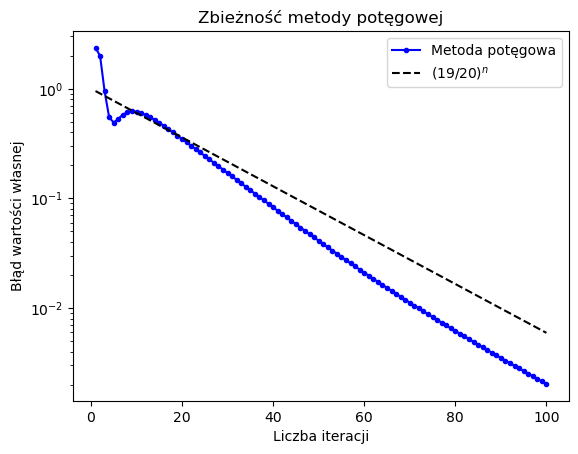

PyObject Text(0.5, 1.0, 'Zbieżność metody potęgowej')

In [511]:
semilogy(1:length(Δλ_pm), Δλ_pm, "b.-")
semilogy(1:length(Δλ_pm), (19/20).^(1:length(Δλ_pm)), "k--")
legend(["Metoda potęgowa", L"(19/20)^n"])
xlabel("Liczba iteracji")
ylabel("Błąd wartości własnej")
title("Zbieżność metody potęgowej")

In [512]:
Δλ_j_plot = []
for i = 1:length(Δλ_j)
    push!(Δλ_j_plot, mean(Δλ_j[i]))
end

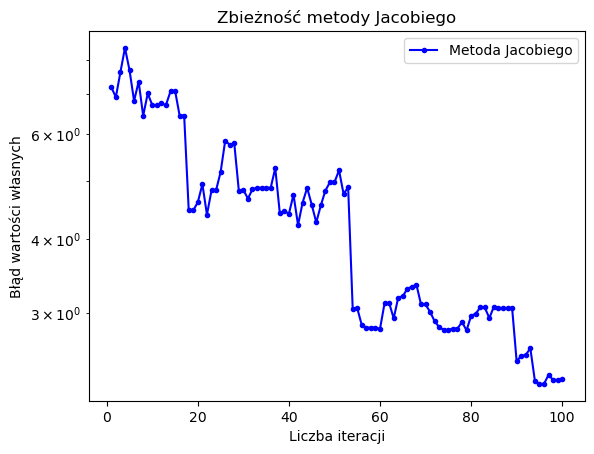

PyObject Text(0.5, 1.0, 'Zbieżność metody Jacobiego')

In [513]:
semilogy(1:length(Δλ_j), Δλ_j_plot, "b.-")
legend(["Metoda Jacobiego"])
xlabel("Liczba iteracji")
ylabel("Błąd wartości własnych")
title("Zbieżność metody Jacobiego")

In [514]:
Δλ_q_plot = []
for i = 1:length(Δλ_q)
    push!(Δλ_q_plot, mean(Δλ_q[i]))
end

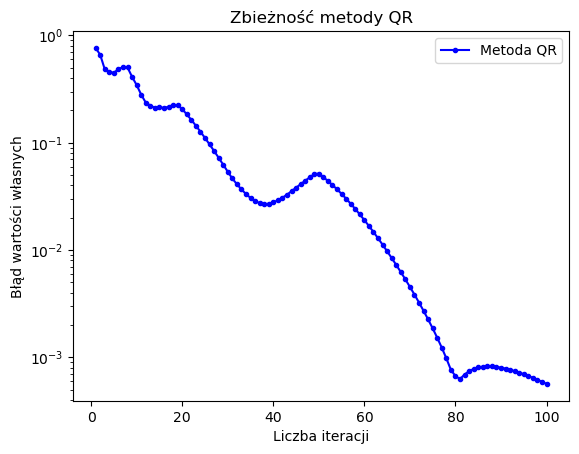

PyObject Text(0.5, 1.0, 'Zbieżność metody QR')

In [515]:
semilogy(1:length(Δλ_q), Δλ_q_plot, "b.-")
legend(["Metoda QR"])
xlabel("Liczba iteracji")
ylabel("Błąd wartości własnych")
title("Zbieżność metody QR")

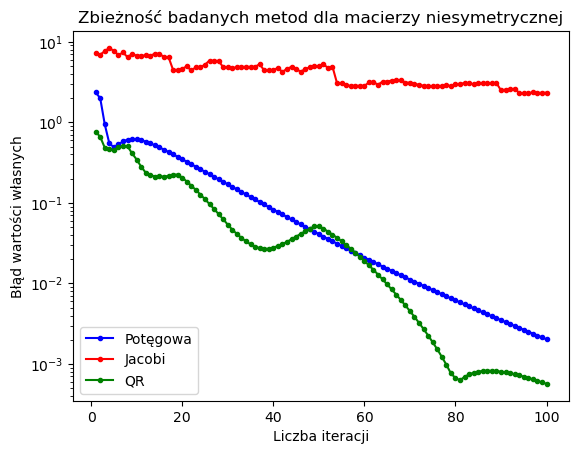

PyObject Text(0.5, 1.0, 'Zbieżność badanych metod dla macierzy niesymetrycznej')

In [516]:
semilogy(1:length(Δλ_pm), Δλ_pm, "b.-")
semilogy(1:length(Δλ_j), Δλ_j_plot, "r.-")
semilogy(1:length(Δλ_q), Δλ_q_plot, "g.-")
legend(["Potęgowa", "Jacobi", "QR"])
xlabel("Liczba iteracji")
ylabel("Błąd wartości własnych")
title("Zbieżność badanych metod dla macierzy niesymetrycznej")

In [536]:
A = randn(20,20);
A = A * diagm(1:20) / A;
B = Symmetric(A);
λ, E = eigen(B);
λ;

20-element Vector{Float64}:
 -57.077039746020105
 -40.19781601309852
 -15.899920235150162
 -14.4551466616726
  -5.251429033862522
  -1.5928125327512248
   0.07321893757028874
   5.736013289182097
   7.135232617443876
   9.791293215211951
  12.057439613725691
  15.46476084361926
  15.951703911839175
  19.22494341750741
  24.488474614182223
  25.74628124517926
  31.280267082457122
  36.589591124608674
  58.23882606822997
  82.69611824179832

In [537]:
λ_pm, x_pm, Δλ_pm = typed_power_method_err(B, 1000, λ[end]);

In [538]:
λ_j, x_j, Δλ_j = jacobi_err(B, 1000, λ);

In [539]:
λ_q, x_q, Δλ_q = QR_eigen_err(B, 1000, λ);

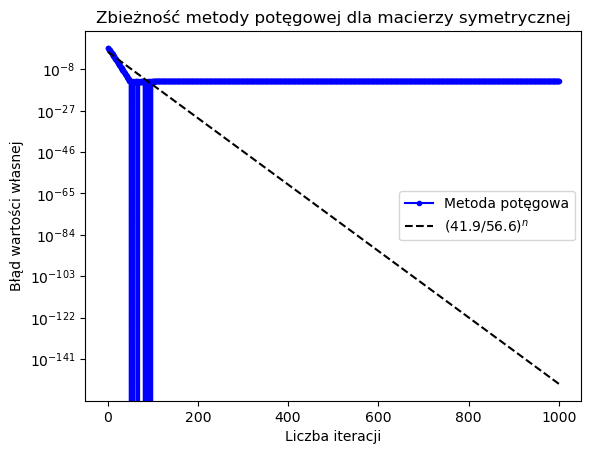

PyObject Text(0.5, 1.0, 'Zbieżność metody potęgowej dla macierzy symetrycznej')

In [541]:
semilogy(1:length(Δλ_pm), Δλ_pm, "b.-")
semilogy(1:length(Δλ_pm), (λ[end-1] / λ[end]).^(1:length(Δλ_pm)), "k--")
legend(["Metoda potęgowa", L"(41.9/56.6)^n"])
xlabel("Liczba iteracji")
ylabel("Błąd wartości własnej")
title("Zbieżność metody potęgowej dla macierzy symetrycznej")

In [437]:
Δλ_j_plot = []
for i = 1:length(Δλ_j)
    push!(Δλ_j_plot, mean(Δλ_j[i]))
end

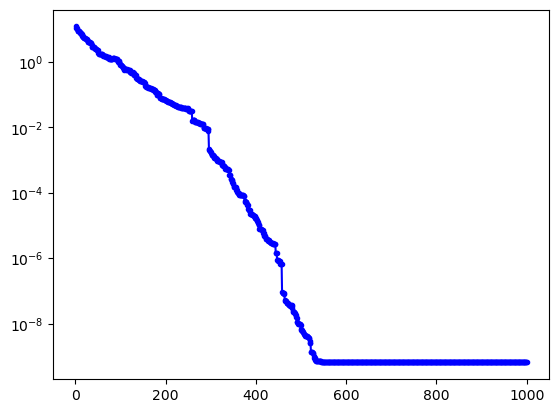

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcfa21d5a60>

In [438]:
semilogy(1:length(Δλ_j), Δλ_j_plot, "b.-")

In [439]:
Δλ_q_plot = []
for i = 1:length(Δλ_q)
    push!(Δλ_q_plot, mean(Δλ_q[i]))
end

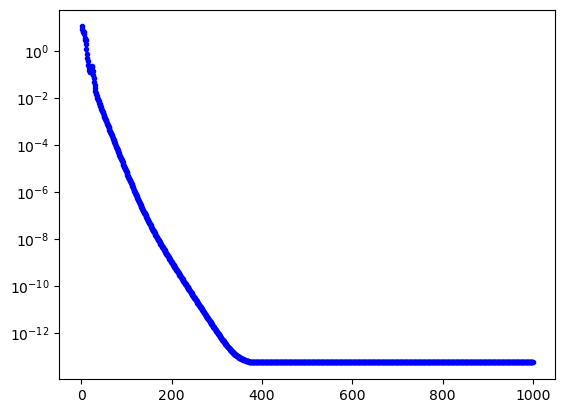

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcfa216e9a0>

In [440]:
semilogy(1:length(Δλ_q), Δλ_q_plot, "b.-")

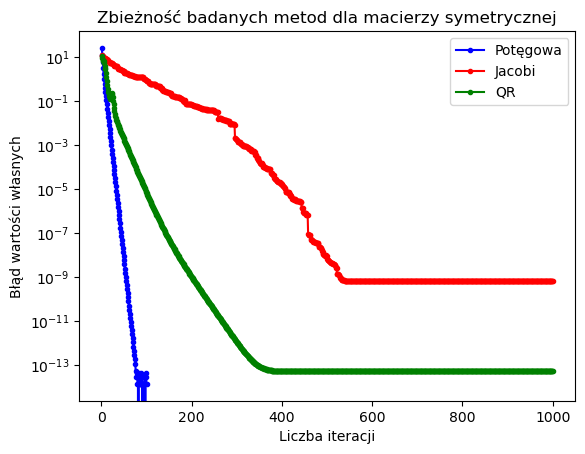

PyObject Text(0.5, 1.0, 'Zbieżność badanych metod dla macierzy symetrycznej')

In [443]:
semilogy(1:length(Δλ_pm), Δλ_pm, "b.-")
semilogy(1:length(Δλ_j), Δλ_j_plot, "r.-")
semilogy(1:length(Δλ_q), Δλ_q_plot, "g.-")
legend(["Potęgowa", "Jacobi", "QR"])
xlabel("Liczba iteracji")
ylabel("Błąd wartości własnych")
title("Zbieżność badanych metod dla macierzy symetrycznej")